In [40]:
import numpy as np
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import Point, Polygon
from shapely.ops import voronoi_diagram
from scipy.spatial import Voronoi
from utils import *
import re

Need to map constituency data -> map of constituencies
remove old constituency boundaries and overlay new ones
Count # votes within each constituency

In [41]:
# Load data, votes_dataset is the voting data and const_2024 is constituency boundaries
votes_dataset = pd.read_csv('./data/2024.csv')
with open('./data/const_2024.geojson', 'r') as f:
    gj = json.load(f)
const_2024_gdf = gpd.GeoDataFrame.from_features(gj["features"])

In [42]:
# Remove special characters from constituency name fields to properly join the datasets (needed for some welsh names)
const_2024_gdf["PCON24NM"] = const_2024_gdf["PCON24NM"].str.replace(r'[^a-zA-Z]', '', regex=True)
votes_dataset["Constituency name"] = votes_dataset["Constituency name"].str.replace(r'[^a-zA-Z]', '', regex=True)

In [43]:
# Merge datasets on constituency name
merged_data = pd.merge(const_2024_gdf, votes_dataset, left_on="PCON24NM", right_on="Constituency name", how="outer")

Empty GeoDataFrame
Columns: [geometry, FID, PCON24CD, PCON24NM, PCON24NMW, BNG_E, BNG_N, LONG, LAT, GlobalID, ONS ID, ONS region ID, Constituency name, County name, Region name, Country name, Constituency type, Declaration time, Member first name, Member surname, Member gender, Result, First party, Second party, Electorate, Valid votes, Invalid votes, Majority, Con, Lab, LD, RUK, Green, SNP, PC, DUP, SF, SDLP, UUP, APNI, All other candidates, Of which other winner]
Index: []
geometry                 POLYGON ((334452.597 341546.002900001, 334443....
FID                                                                    640
PCON24CD                                                         W07000102
PCON24NM                                         MontgomeryshireandGlyndwr
PCON24NMW                                                                 
BNG_E                                                               302272
BNG_N                                                               30

Now build a mapping between voting data and geo data

c:\Users\User\Documents\Projects\diss\CVDDMUK\utils.py:138: RuntimeWarning: divide by zero encountered in scalar divide
  r = (area / (n * np.pi)) ** 0.5


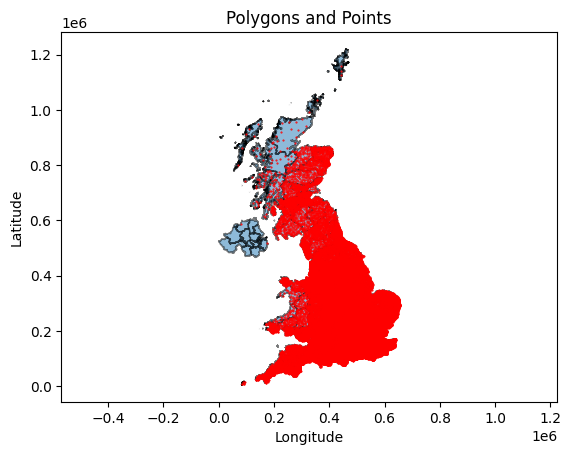

In [ ]:
points = []
polygons = []

for i in range(len(merged_data)):
    row = merged_data.iloc[i]
    points += place_n_points(row["geometry"], row["LD"]//100)
    polygons.append(row["geometry"])

plot_points_and_map(points, polygons, 1)

Read generated points from GeoJSON

[<POINT (274298.913 190657.256)>, <POINT (284306.542 194808.125)>, <POINT (280189.718 192280.044)>, <POINT (284065.709 185556.611)>, <POINT (290186.926 198772.205)>, <POINT (279964.506 189304.843)>, <POINT (283809.449 189916.788)>, <POINT (283313.21 197715.036)>, <POINT (281236.985 181265.508)>, <POINT (278658.772 184637.821)>, <POINT (393906.723 813309.157)>, <POINT (384244.686 814552.312)>, <POINT (387042.772 809999.615)>, <POINT (389630.729 809638.593)>, <POINT (392125.678 808979.713)>, <POINT (394518.165 810124.312)>, <POINT (393168.254 807005.688)>, <POINT (388758.428 807239.022)>, <POINT (395570.144 808027.034)>, <POINT (391453.72 806245.457)>, <POINT (386488.843 808306.707)>, <POINT (384743.684 808409.122)>, <POINT (382930.407 800232.005)>, <POINT (382470.408 803864.208)>, <POINT (397532.083 804413.279)>, <POINT (388759.456 804935.508)>, <POINT (393902.789 805470.916)>, <POINT (397480.944 805926.732)>, <POINT (394030.375 800606.798)>, <POINT (391322.527 804130.094)>, <POINT (395

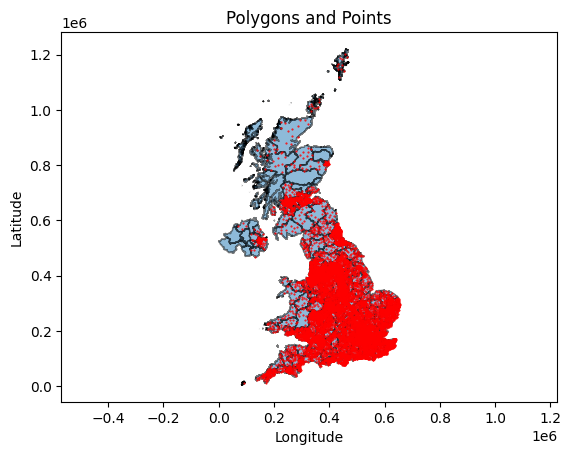

In [52]:
geojson_file = './generated_points/green.geojson'
gdf = gpd.read_file(geojson_file)
points = gdf.geometry.tolist()

official_const = merged_data["geometry"].tolist()
print(points)
plot_points_and_map(points, official_const, 1)

# m = plot_points_and_map_interactive(points, official_const)
# m

In [54]:
save_gdf = gpd.GeoDataFrame(geometry=points)
save_gdf.to_file("generated_points/conservative.geojson", driver="GeoJSON")


c:\Users\User\Documents\Projects\diss\CVDDMUK\venv\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
